# IE 582 Homework 1 - FALL'24

Berat Kubilay Güngez - 2021402087

## Table of Contents
1. [Introduction](#introduction)
2. [Related Literature](#RelatedLiterature)
3. [Data Preprocessing and Analysis](#datainspection)
    * 3a. [Imports](#imports)
    * 3b. [Analysis of the Output](#output)
    * 3c. [Analysis of the Input](#input)
4. [Comparison in Linear Models](#linear)
5. [Conclusions](#conclusion)
6. [Code](#code)

## 1. Introduction <a name="introduction"></a>

As high-frequency communication technologies like 5G evolve, designing efficient antennas has become crucial. Antenna performance, often evaluated by the S11 parameter, requires computationally intensive electromagnetic (EM) simulations, making traditional trial-and-error methods impractical. To address this, machine learning provides a data-driven approach to model and predict antenna characteristics based on design parameters. This assignment uses techniques like Principal Component Analysis (PCA) for dimensionality reduction and linear regression for predictive modeling to better understand and simplify the complex relationships within antenna design, aiming to improve efficiency in creating high-performance systems.

## 2. Related Literature <a name="RelatedLiterature"></a>

In electrical network analysis, S-parameters (scattering parameters) describe how an electromagnetic signal interacts at different network ports, typically in high-frequency circuits. The S11 parameter, a specific type of S-parameter, measures the reflection at the input port—indicating how much signal is reflected back rather than transmitted. This reflection coefficient helps engineers assess antenna efficiency and impedance matching, critical for minimizing signal loss in RF designs. S-parameters like S11 are widely used for their practicality in evaluating performance across frequencies without needing complex internal device details.

For more, see [Ansys on S-parameters](https://www.ansys.com/simulation-topics/what-are-s-parameters#:~:text=Scattering%20parameters%20%E2%80%94%20also%20known%20as,stimulated%20by%20an%20electrical%20signal.).


## 3. Data Preprocessing and Analysis <a name="datainspection"></a>

### 3a. Imports <a name="imports"></a>

In [272]:
import pandas as pd # data processing
import numpy as np # mathematical operations
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.preprocessing import StandardScaler # data scaling
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.model_selection import train_test_split # data splitting
import statsmodels.api as sm # statistical modeling

### 3b. Analysis of the Output <a name="output"></a>

To comprehend the characteristics of S11 parameter data across various frequencies, the real and imaginary components of the data are imported. Then, the magnitude of the data is computed. Given that the magnitude of the S11 parameters encapsulates its performance, lower S11 parameter values indicate reduced signal reflection.

In [273]:
real_ouput_data_loc = "data/hw1_real.csv" 

real_output_df = pd.read_csv(real_ouput_data_loc)

img_output_data_loc = "data/hw1_img.csv" 

img_output_df = pd.read_csv(img_output_data_loc)

output_df = np.sqrt(real_output_df **2 + img_output_df **2) # Magnitude of the S11 parameter

output_df.head()

0         1         2         3         4         5         6  \
0  0.781778  0.783440  0.785795  0.788790  0.792359  0.796433  0.800936   
1  0.986860  0.986669  0.986470  0.986263  0.986048  0.985824  0.985592   
2  0.866883  0.865643  0.864258  0.862724  0.861039  0.859198  0.857199   
3  0.995069  0.995055  0.995041  0.995025  0.995009  0.994991  0.994973   
4  0.985009  0.985235  0.985447  0.985645  0.985831  0.986005  0.986169   

          7         8         9  ...       191       192       193       194  \
0  0.805793  0.810930  0.816277  ...  0.988520  0.988551  0.988581  0.988610   
1  0.985350  0.985100  0.984839  ...  0.945061  0.945880  0.946669  0.947428   
2  0.855036  0.852705  0.850202  ...  0.865665  0.861328  0.856551  0.851268   
3  0.994953  0.994933  0.994912  ...  0.935682  0.932755  0.929637  0.926312   
4  0.986321  0.986464  0.986597  ...  0.988472  0.988418  0.988361  0.988304   

        195       196       197       198       199       200  
0  0.988638  0.988664  0.988690  0.988714  0.988737  0.988759  
1  0.948158  0.948861  0.949537  0.950188  0.950814  0.951417  
2  0.845404  0.838870  0.831564  0.823368  0.814148  0.803752  
3  0.922765  0.918978  0.914932  0.910607  0.905982  0.901033  
4  0.988244  0.988183  0.988121  0.988057  0.987991  0.987924  

[5 rows x 201 columns]

To begin, a single output is selected to analyze the distribution of the real part, imaginary part, and magnitude in comparison to one another. The third sample was chosen due to its characteristics.

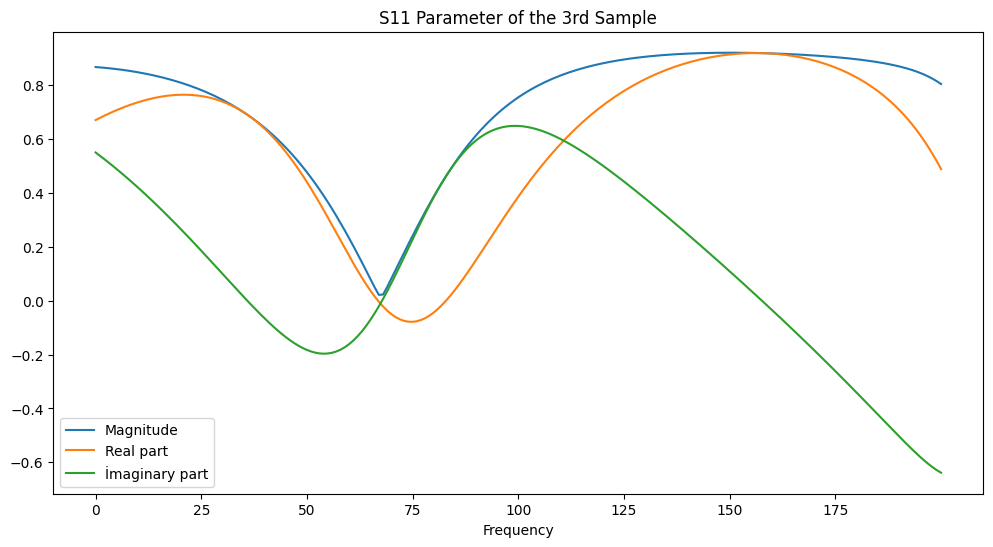

In [274]:
plt.figure(figsize=(12, 6))

plt.plot(output_df.iloc[2], label="Magnitude")
plt.plot(real_output_df.iloc[2], label="Real part")
plt.plot(img_output_df.iloc[2], label="İmaginary part")

plt.title("S11 Parameter of the 3rd Sample")
plt.legend(loc="best", fontsize=10)

plt.xticks(range(0, 200, 25))
plt.xlabel("Frequency")
plt.show()

Then first 15 samples are plotted to see different characteristics.

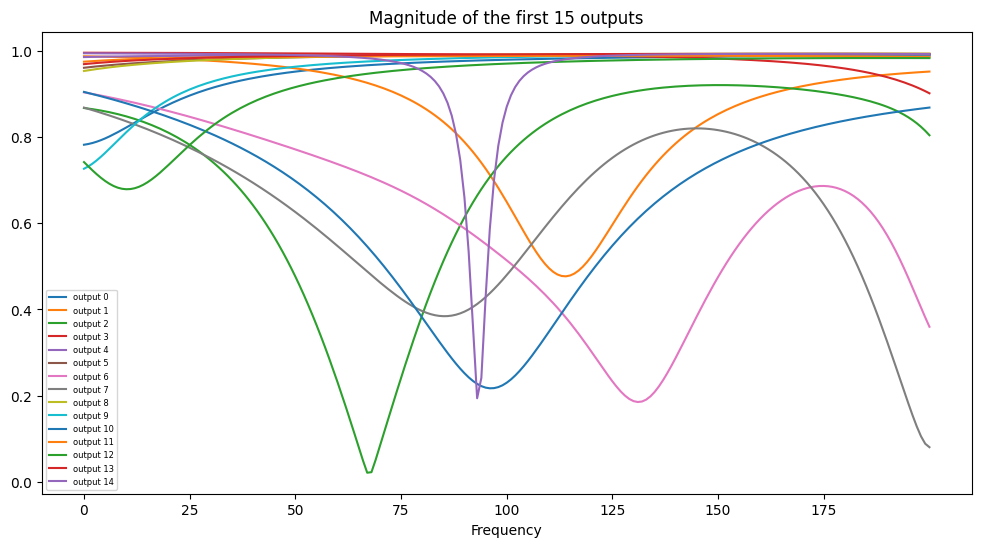

In [275]:
plt.figure(figsize=(12, 6))

for i in range(0,15):
    plt.plot(output_df.iloc[i], label=f"output {i}")

plt.legend(loc="best", fontsize=6)

plt.title("Magnitude of the first 15 outputs")

plt.xticks(range(0, 200, 25))
plt.xlabel("Frequency")
plt.show()

As can be seen in the plot above, each sample exhibits distinct characteristics at various frequency values. Among these samples, output 2 appears to perform best around the 60th frequency value compared to others. Approximately six outputs reflect nearly all of the signal back meaning that they do not perform well.

To apply predictive approaches later, data needs to be simplified in a way that there will be only one output value that captures the variability of all frequencies. One option seems to be using minimum values. To make it more applicable, the average of the minimum 25 values is calculated. 

In [276]:
min_values_output = output_df.apply(lambda x: x.nsmallest(25).mean(), axis=1)
min_values_index = output_df.idxmin(axis=1)

min_values_real = real_output_df.apply(lambda x: x.nsmallest(25).mean(), axis=1)
min_values_img = img_output_df.apply(lambda x: x.nsmallest(25).mean(), axis=1)

The plot below illustrates the output values that will be generated in the event of utilizing the average of the 25 minimum values.

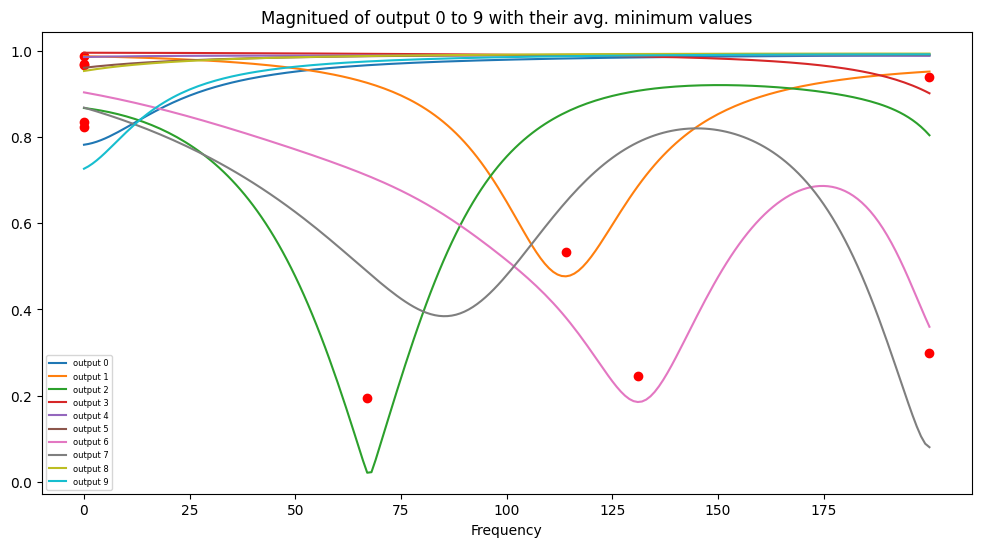

In [277]:
plt.figure(figsize=(12, 6))

for i in range(0,10):
    plt.plot(output_df.iloc[i], label=f"output {i}")
    plt.scatter(min_values_index[i], min_values_output[i], color="red")

plt.legend(loc="best", fontsize=6)
plt.title("Magnitued of output 0 to 9 with their avg. minimum values")
plt.xticks(range(0, 200, 25))
plt.xlabel("Frequency")
plt.show()

One other option is applying Principal Component Analysis(PCA) to the output data. PCA is a dimensionality reduction technique that transforms data into a lower-dimensional space while preserving the variance of the data. By applying PCA to the output data, the number of output variables can be reduced to a smaller set of principal components that capture the most significant variance in the data.

In [278]:
pca = PCA(n_components=1) # Only one component is selected for simplicity

principal_components = pca.fit_transform(output_df) # Transform the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance
Comp.1            2.400357                0.610351

Results of Principal Component Analysis (PCA) indicate that 61% of the variability in the magnitude of S11 parameters can be captured by a single output. This finding is advantageous as variability is a crucial factor that is learned during the training process of Machine Learning models. 

When all of the principal components are considered, it can be seen that only 3 components are enough to capture 85% of the variability in the data.

In [279]:
pca = PCA() # No limit on the number of components

principal_components = pca.fit_transform(output_df) # Transform the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance  Cumulative Proportion
Comp.1          2.400357e+00            6.103513e-01               0.610351
Comp.2          1.119120e+00            1.326727e-01               0.743024
Comp.3          1.064786e+00            1.201026e-01               0.863127
Comp.4          7.307837e-01            5.657257e-02               0.919699
Comp.5          4.739296e-01            2.379336e-02               0.943493
...                      ...                     ...                    ...
Comp.197        4.019508e-14            1.711489e-28               1.000000
Comp.198        1.117213e-14            1.322210e-29               1.000000
Comp.199        5.747085e-15            3.498835e-30               1.000000
Comp.200        2.505320e-15            6.648975e-31               1.000000
Comp.201        1.065973e-15            1.203706e-31               1.000000

[201 rows x 3 columns]

Same technique is applied to the real and imaginary parts of the data as well.

In [280]:
pca = PCA(n_components=1) # Only one component is selected for simplicity

principal_components_real = pca.fit_transform(real_output_df) # Transform the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance
Comp.1            8.817202                0.855197

PCA on the real part of the data is performed even better. Suggests a single value can capture 85% of the variability. And the table below shows that only 5 components are enough to capture almost 99% of the variability.

In [281]:
pca = PCA() # No limit on the number of components

principal_components = pca.fit_transform(real_output_df) # Transform the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance  Cumulative Proportion
Comp.1          8.817202e+00            8.551972e-01               0.855197
Comp.2          2.161807e+00            5.140891e-02               0.906606
Comp.3          1.999371e+00            4.397353e-02               0.950580
Comp.4          1.486475e+00            2.430636e-02               0.974886
Comp.5          9.854447e-01            1.068241e-02               0.985568
...                      ...                     ...                    ...
Comp.197        8.123715e-16            7.259622e-33               1.000000
Comp.198        8.123715e-16            7.259622e-33               1.000000
Comp.199        8.123715e-16            7.259622e-33               1.000000
Comp.200        4.924351e-16            2.667489e-33               1.000000
Comp.201        3.381690e-16            1.257976e-33               1.000000

[201 rows x 3 columns]

In [282]:
pca = PCA(n_components=1) # Only one component is selected for simplicity

principal_components_img = pca.fit_transform(img_output_df) # Transform the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance
Comp.1            3.135929                0.419402

PCA on the imaginary part of the data performs worse compared to other data sets. This suggests that a single value can only capture 49% of the variability. However, this approach can still be effective in certain applications, depending on the specific use case.

The table below shows that only 5 components are enough to capture almost 95% of the variability. For simplicity only the 1st component is used in the following analysis but using more components can give better results.


In [283]:
pca = PCA() # No limit on the number of components

principal_components = pca.fit_transform(img_output_df) # Transform the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance  Cumulative Proportion
Comp.1          3.135929e+00            4.194022e-01               0.419402
Comp.2          2.299117e+00            2.254344e-01               0.644837
Comp.3          1.941158e+00            1.607015e-01               0.805538
Comp.4          1.555338e+00            1.031687e-01               0.908707
Comp.5          9.440560e-01            3.800964e-02               0.946716
...                      ...                     ...                    ...
Comp.197        2.103890e-16            1.887750e-33               1.000000
Comp.198        2.086132e-16            1.856015e-33               1.000000
Comp.199        1.914544e-16            1.563251e-33               1.000000
Comp.200        1.734331e-16            1.282809e-33               1.000000
Comp.201        1.140238e-16            5.544844e-34               1.000000

[201 rows x 3 columns]

### 3c. Analysis of the Input <a name="input"></a>

In [284]:
input_data_loc = "data/hw1_input.csv"

input_df = pd.read_csv(input_data_loc)

input_df.head()

length of patch  width of patch  height of patch  height of substrate  \
0         3.202024        2.288742         0.012514             0.139247   
1         2.107848        2.895504         0.037171             0.149492   
2         3.252113        4.818411         0.025432             0.578834   
3         4.161509        2.294309         0.011058             0.117266   
4         4.820912        2.948325         0.019658             0.163503   

   height of solder resist layer  radius of the probe     c_pad  c_antipad  \
0                       0.041757             0.028566  0.000549   0.032403   
1                       0.056775             0.028930  0.005536   0.053647   
2                       0.029972             0.030922  0.020274   0.049845   
3                       0.093223             0.017604  0.001135   0.098610   
4                       0.094337             0.025757  0.021725   0.072813   

    c_probe  dielectric constant of substrate  \
0  0.348140                          3.735926   
1  0.326369                          4.929862   
2  0.446639                          4.772670   
3  0.055665                          4.102438   
4  0.272282                          2.531031   

   dielectric constant of solder resist layer  
0                                    4.278575  
1                                    4.876068  
2                                    4.745106  
3                                    3.755671  
4                                    3.047553

Input values are composed of several geometric features. As can be observed in the accompanying table, these features have distinct ranges. Consequently, it is necessary to scale the data to prevent any potential effects. This scaling process is performed after an in-depth examination of the data as it is.

In [285]:
input_df.describe() # Descriptive statistics of the input data

length of patch  width of patch  height of patch  height of substrate  \
count       385.000000      385.000000       385.000000           385.000000   
mean          3.569210        3.536983         0.024273             0.347643   
std           0.966173        1.182100         0.008800             0.272738   
min           1.805658        1.801273         0.010008             0.100321   
25%           2.755534        2.501163         0.016194             0.126901   
50%           3.637716        3.215396         0.024198             0.155254   
75%           4.369311        4.829731         0.031688             0.649324   
max           5.199919        5.198689         0.039843             0.799082   

       height of solder resist layer  radius of the probe       c_pad  \
count                     385.000000           385.000000  385.000000   
mean                        0.060065             0.032198    0.012797   
std                         0.023670             0.010352    0.007111   
min                         0.020039             0.015012    0.000003   
25%                         0.038689             0.023389    0.006985   
50%                         0.060764             0.030979    0.012454   
75%                         0.080247             0.041819    0.019014   
max                         0.099728             0.049960    0.024996   

        c_antipad     c_probe  dielectric constant of substrate  \
count  385.000000  385.000000                        385.000000   
mean     0.060648    0.245586                          3.704384   
std      0.021503    0.111245                          0.853877   
min      0.025292    0.050810                          2.023380   
25%      0.042011    0.148565                          2.998152   
50%      0.060532    0.245049                          3.866295   
75%      0.078227    0.340203                          4.375551   
max      0.099945    0.449599                          4.999324   

       dielectric constant of solder resist layer  
count                                  385.000000  
mean                                     3.521911  
std                                      0.871233  
min                                      2.001679  
25%                                      2.783710  
50%                                      3.480916  
75%                                      4.278575  
max                                      4.999950

Besides the relation between height of substrate and width of patch, there doesn’t seem to be a clear relationship between the input features.


In [286]:
input_df.corr() # Correlation matrix

length of patch  width of patch  \
length of patch                                    1.000000       -0.114174   
width of patch                                    -0.114174        1.000000   
height of patch                                   -0.026032        0.091726   
height of substrate                               -0.064344        0.923739   
height of solder resist layer                      0.044502       -0.021056   
radius of the probe                               -0.069905        0.035675   
c_pad                                             -0.005560       -0.044198   
c_antipad                                         -0.009627       -0.013358   
c_probe                                            0.081735        0.029999   
dielectric constant of substrate                  -0.037448        0.442193   
dielectric constant of solder resist layer        -0.014496        0.038746   

                                            height of patch  \
length of patch                                   -0.026032   
width of patch                                     0.091726   
height of patch                                    1.000000   
height of substrate                                0.082833   
height of solder resist layer                      0.036045   
radius of the probe                                0.030689   
c_pad                                              0.002422   
c_antipad                                          0.037583   
c_probe                                            0.031592   
dielectric constant of substrate                  -0.044318   
dielectric constant of solder resist layer        -0.037769   

                                            height of substrate  \
length of patch                                       -0.064344   
width of patch                                         0.923739   
height of patch                                        0.082833   
height of substrate                                    1.000000   
height of solder resist layer                         -0.011870   
radius of the probe                                    0.017410   
c_pad                                                 -0.031571   
c_antipad                                             -0.009432   
c_probe                                                0.044166   
dielectric constant of substrate                       0.459847   
dielectric constant of solder resist layer             0.002421   

                                            height of solder resist layer  \
length of patch                                                  0.044502   
width of patch                                                  -0.021056   
height of patch                                                  0.036045   
height of substrate                                             -0.011870   
height of solder resist layer                                    1.000000   
radius of the probe                                             -0.012756   
c_pad                                                           -0.018044   
c_antipad                                                       -0.017071   
c_probe                                                          0.024842   
dielectric constant of substrate                                -0.010967   
dielectric constant of solder resist layer                      -0.038405   

                                            radius of the probe     c_pad  \
length of patch                                       -0.069905 -0.005560   
width of patch                                         0.035675 -0.044198   
height of patch                                        0.030689  0.002422   
height of substrate                                    0.017410 -0.031571   
height of solder resist layer                         -0.012756 -0.018044   
radius of the probe                                    1.000000  0.002906   
c_pad                                                  0.002906  1.00

Again, besides the height of substrate and the width of patch, there doesn’t seem to be any interesting relation between features.

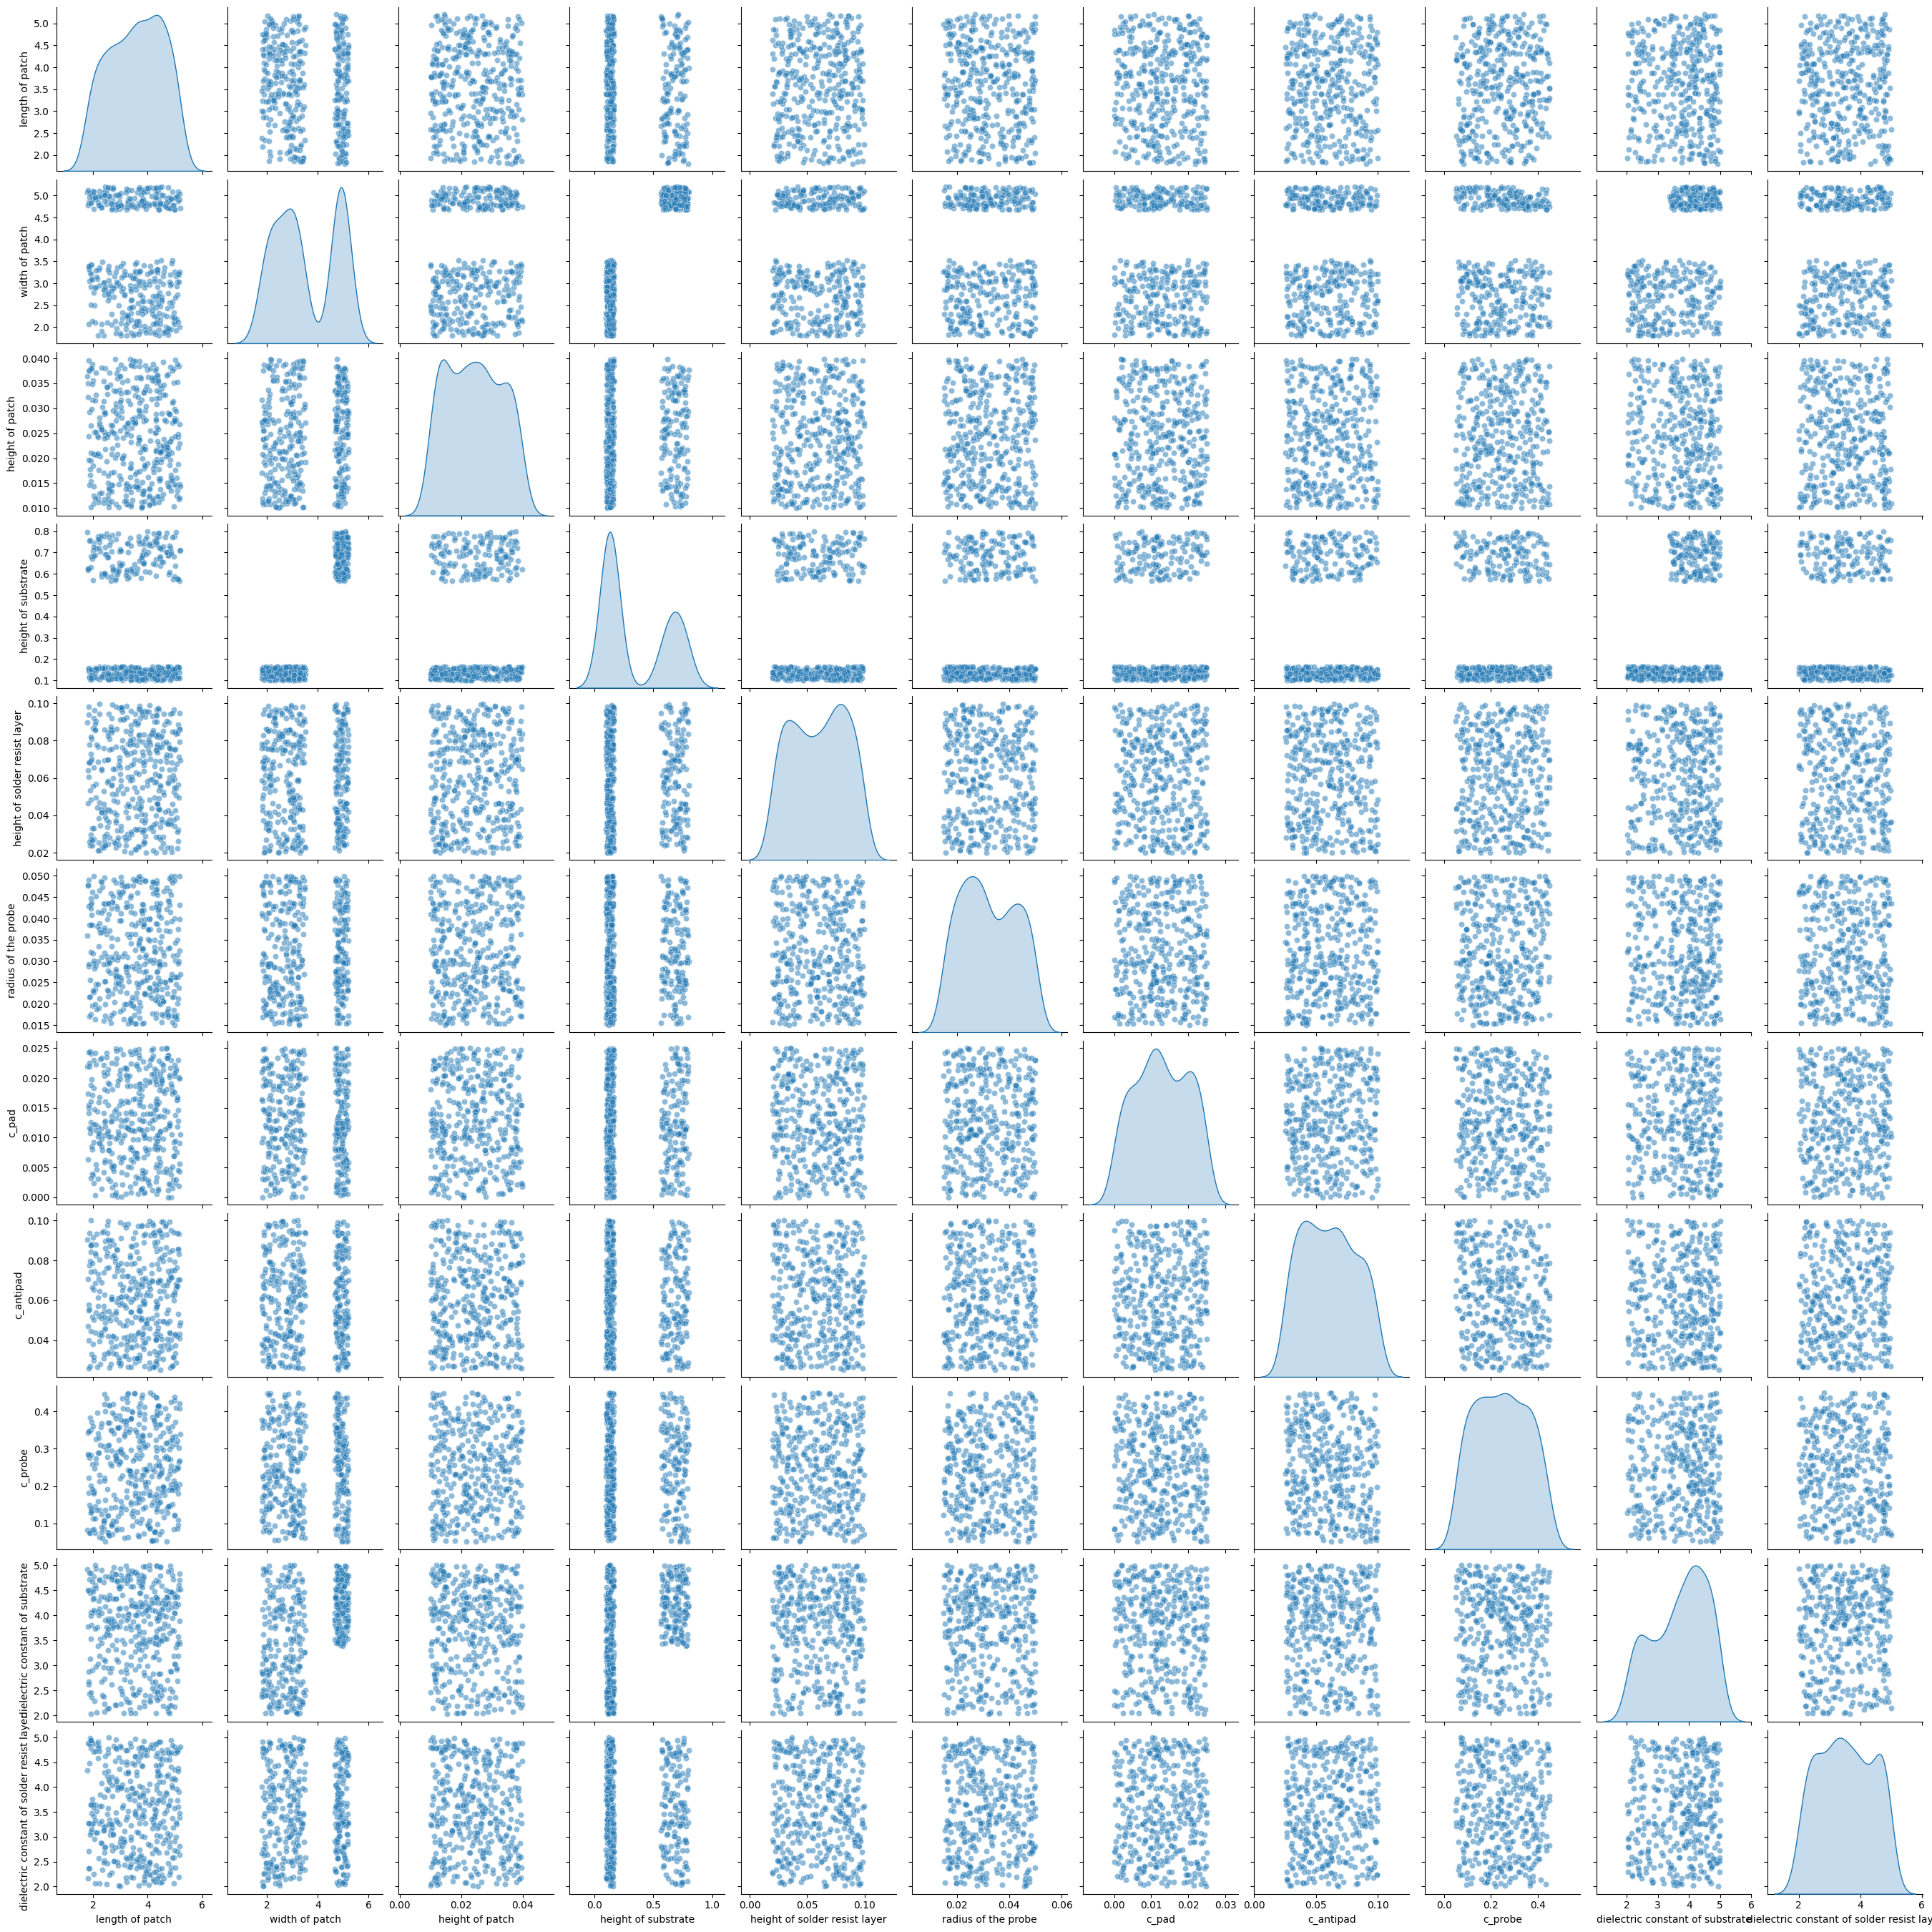

In [287]:
pair_plot = sns.pairplot(input_df, kind='scatter', diag_kind='kde', markers='o', plot_kws={'alpha':0.5}) # Pair plot of the input data

plt.show()

Now, let us see the relation between the height of substrate and the width of the patch more closely. As can be seen below, these two are scattered in two parts. 

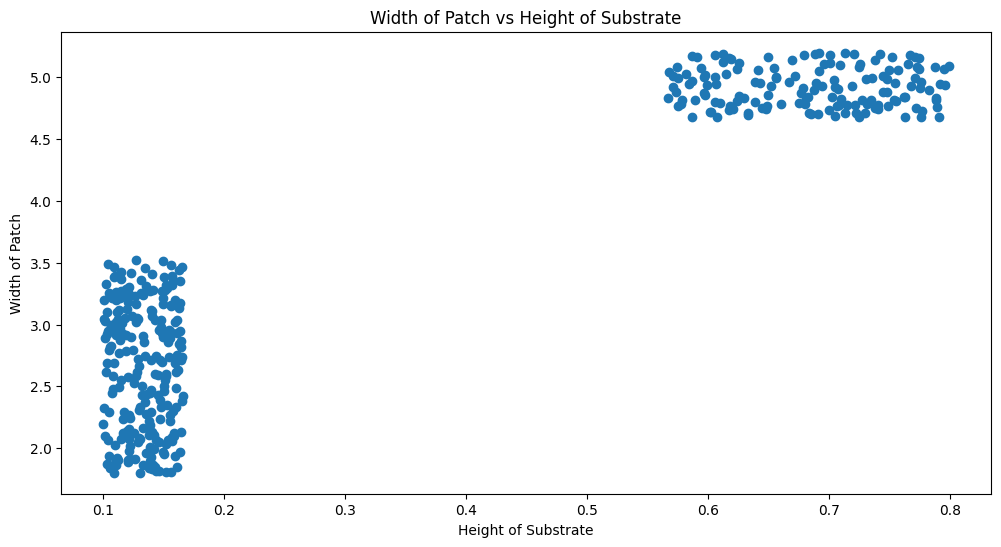

In [288]:
plt.figure(figsize=(12, 6))

plt.scatter(input_df["height of substrate"], input_df["width of patch"])

plt.title("Width of Patch vs Height of Substrate")
plt.xlabel("Height of Substrate")
plt.ylabel("Width of Patch")
plt.show()

To reduce the dimensions of the space, variables can be combined as follows.

In [289]:
input_df["width of patch combined with height of substrate"] = np.where((input_df["width of patch"] > 4) & (input_df["height of substrate"] > 0.4), 1, 0)

input_df.drop(["width of patch", "height of substrate"], axis=1, inplace=True)

Plot below suggests that the combined relation of these two variables may help us to capture the dynamics of the minimum magnitude. Therefore, this manipulation will be used in the following models.

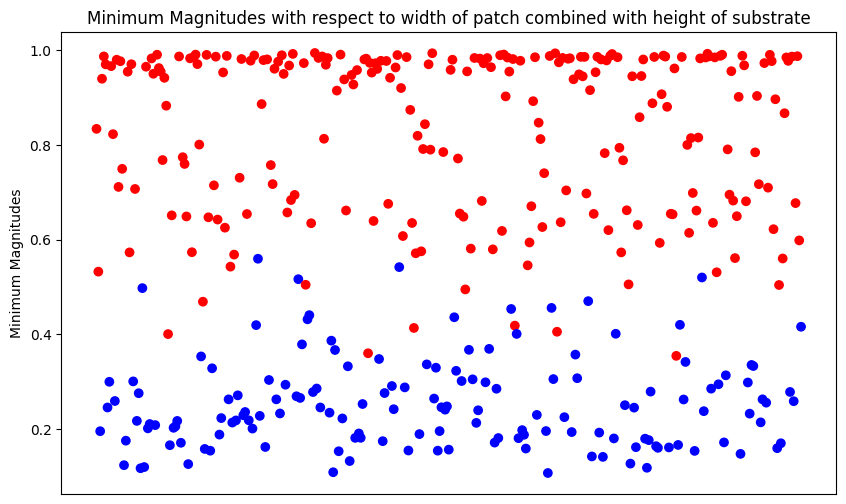

In [290]:
color = {0: "red", 1: "blue"} # Color mapping for the scatter plot to show the combined feature

plt.figure(figsize=(10, 6))
plt.scatter(range(len(min_values_index)), min_values_output, 
            c=input_df["width of patch combined with height of substrate"].map(color)) 

plt.title("Minimum Magnitudes with respect to width of patch combined with height of substrate")
plt.ylabel("Minimum Magnitudes")
plt.xticks([])
plt.show()

Data needs to be scaled as previously discussed. To reduce the effects of outliers(if they exist), standardization is applied.

In [291]:
scaler = StandardScaler() # Standardize the data

input_df_scaled = pd.DataFrame(scaler.fit_transform(input_df), columns=input_df.columns) # Transform the data

input_df_scaled.head()

length of patch  height of patch  height of solder resist layer  \
0        -0.380536        -1.338036                      -0.774472   
1        -1.514495         1.467538                      -0.139201   
2        -0.328626         0.131827                      -1.272998   
3         0.613834        -1.503664                       1.402635   
4         1.297212        -0.525081                       1.449735   

   radius of the probe     c_pad  c_antipad   c_probe  \
0            -0.351267 -1.724662  -1.315281  0.923074   
1            -0.316141 -1.022443  -0.326035  0.727110   
2            -0.123460  1.052887  -0.503034  1.809644   
3            -1.411656 -1.642198   1.767754 -1.709451   
4            -0.622998  1.257188   0.566491  0.240287   

   dielectric constant of substrate  \
0                          0.036988   
1                          1.437061   
2                          1.252729   
3                          0.466780   
4                         -1.375936   

   dielectric constant of solder resist layer  \
0                                    0.869628   
1                                    1.556322   
2                                    1.405808   
3                                    0.268659   
4                                   -0.545176   

   width of patch combined with height of substrate  
0                                         -0.798935  
1                                         -0.798935  
2                                          1.251666  
3                                         -0.798935  
4                                         -0.798935

Correlation values between features and the average 25 minimum values of magnitude values are calculated below. It suggests the previously manipulated combined feature has a high correlation and may be effective in linear models.

In [292]:
input_df_scaled.corrwith(min_values_output).sort_values(ascending=False)

length of patch                                     0.149842
c_pad                                               0.069841
c_antipad                                           0.030746
height of solder resist layer                       0.013917
radius of the probe                                -0.007607
c_probe                                            -0.019620
height of patch                                    -0.063299
dielectric constant of solder resist layer         -0.075817
dielectric constant of substrate                   -0.481474
width of patch combined with height of substrate   -0.886938
dtype: float64

Now, let’s apply the PCA method to further simplify the input data set.

In [293]:
pca_df = input_df_scaled.copy()

pca_df.drop("width of patch combined with height of substrate", axis=1, inplace=True) # Dropping the categorical feature

Categorical feature is dropped because one of the PCA's assumptions is that the data is numeric and is distributed normally.

In [294]:
pca = PCA() # Do not limit the number of components to see the explained variance of all components

principal_components = pca.fit(pca_df) # Fit the data

explained_variance_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
}, index=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))])

explained_variance_df

Standard deviation  Proportion of Variance  Cumulative Proportion
Comp.1            1.104823                0.135274               0.135274
Comp.2            1.059588                0.124423               0.259697
Comp.3            1.042818                0.120516               0.380213
Comp.4            1.009667                0.112976               0.493189
Comp.5            0.999758                0.110769               0.603958
Comp.6            0.972026                0.104709               0.708667
Comp.7            0.969715                0.104212               0.812878
Comp.8            0.940186                0.097962               0.910840
Comp.9            0.896956                0.089160               1.000000

Table above suggests that there doesn’t seem to be a clear winner that captures most of the variability itself. Since most of the components have a similar proportion of the variance.

See table below to understand and compare the content of components

In [295]:
loadings_df = pd.DataFrame(pca.components_.T, columns=[f'Comp.{i+1}' for i in range(len(pca.explained_variance_))], index=pca_df.columns)

loadings_df

Comp.1    Comp.2    Comp.3  \
length of patch                             0.319646 -0.025815 -0.595711   
height of patch                             0.059382 -0.514137  0.230340   
height of solder resist layer               0.269357 -0.215348 -0.217159   
radius of the probe                         0.004249 -0.195689  0.662581   
c_pad                                      -0.259423 -0.330291 -0.146192   
c_antipad                                  -0.556287 -0.245124 -0.192633   
c_probe                                     0.562431  0.034002  0.171857   
dielectric constant of substrate           -0.038179  0.604910  0.133207   
dielectric constant of solder resist layer -0.356633  0.337754  0.011891   

                                              Comp.4    Comp.5    Comp.6  \
length of patch                             0.292983  0.233550 -0.211242   
height of patch                            -0.291507  0.372631 -0.540260   
height of solder resist layer              -0.430974  0.431274  0.667127   
radius of the probe                         0.255579  0.157651  0.285254   
c_pad                                       0.547369  0.014845  0.323602   
c_antipad                                  -0.074022  0.291205 -0.115210   
c_probe                                     0.401044  0.294562 -0.131520   
dielectric constant of substrate           -0.206798  0.326084  0.019769   
dielectric constant of solder resist layer  0.263499  0.563588 -0.037246   

                                              Comp.7    Comp.8    Comp.9  
length of patch                            -0.288572 -0.323017 -0.411906  
height of patch                             0.266577  0.139445 -0.269928  
height of solder resist layer              -0.018495  0.118387  0.052558  
radius of the probe                        -0.400929 -0.346496 -0.265191  
c_pad                                       0.607875  0.005726 -0.167748  
c_antipad                                  -0.152863 -0.461867  0.503101  
c_probe                                     0.167223 -0.014750  0.599916  
dielectric constant of substrate            0.462814 -0.461898 -0.194545  
dielectric constant of solder resist layer -0.222571  0.561443 -0.073395

Plot below shows the variance explained by each component. 10% of the variance may be a good threshold to decide on the number of components to be used.

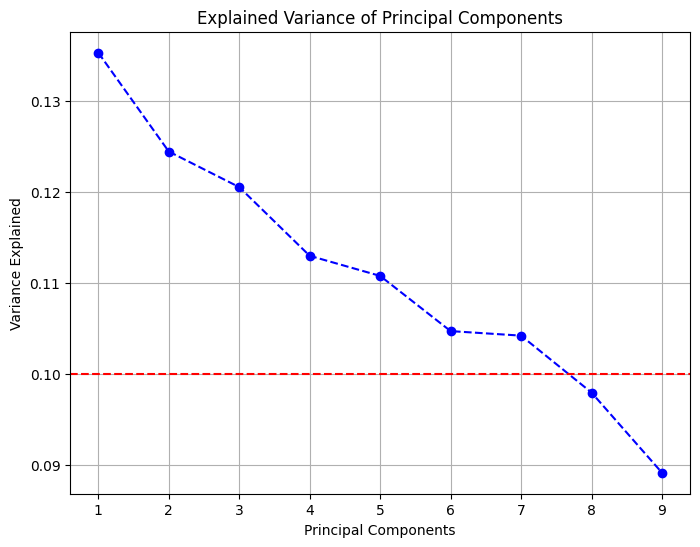

In [296]:
explained_variance = explained_variance_df["Proportion of Variance"]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.1, color='r', linestyle='--') # 10% explained variance threshold

plt.title("Explained Variance of Principal Components")
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

Plot below shows the cumulative variance explained by the components. It suggests that around 80% of the variance can be explained by 7 components.

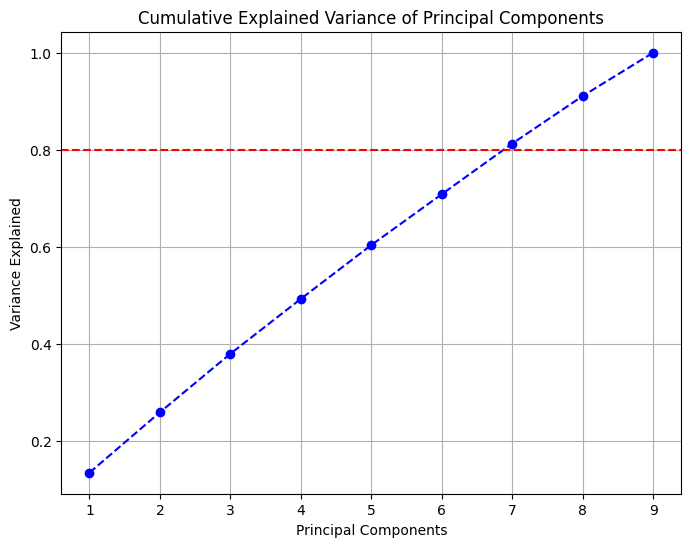

In [297]:
cumulative_variance = explained_variance_df["Cumulative Proportion"]

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.8, color='r', linestyle='--')  # 80% cumulative explained variance threshold

plt.title('Cumulative Explained Variance of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

Finally, the number of components is decided as 7. Then the data is transformed into the new space with the addition of the categorical feature.

In [298]:
transformed_input_df = pd.DataFrame(pca.transform(pca_df), columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_))]) # Transform the data

transformed_input_df.drop(columns=["PC9", "PC8"], inplace=True, axis=1) # Dropping the last two components

# Adding the categorical feature
transformed_input_df["width of patch combined with height of substrate"] = input_df_scaled["width of patch combined with height of substrate"] 

transformed_input_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.975511  2.172806  0.533331  0.267580 -0.611399 -0.373230 -0.961117   
1 -0.190132  1.213715  1.608164 -1.023334  1.533051 -1.074461  0.826188   
2  0.034671  1.308687  0.858340  1.833032  1.006886 -0.753197  1.489438   
3 -1.153707  1.155495 -2.280813 -2.088161  0.255904  0.704724 -1.436043   
4  0.512146 -1.516188 -2.062709  0.632568  0.132800  1.102164 -0.089013   

   width of patch combined with height of substrate  
0                                         -0.798935  
1                                         -0.798935  
2                                          1.251666  
3                                         -0.798935  
4                                         -0.798935

## 4. Comparison in Linear Models <a name="linear"></a>

In the following section, error metrics are used to compare different feature sets and outputs. This kind of approach was chosen because examining the differences in these error metrics provides valuable insight into the performance of the models.

In [299]:
# Error metrics
def accu(actual, forecast):
    error = actual - forecast
    mean = np.mean(actual)
    sd = np.std(actual)
    CV = sd / mean # Coefficient of Variation
    FBias = np.sum(error) / np.sum(actual) # Forecast Bias
    MAPE = np.sum(np.abs(error / (actual+1))) / len(actual) # Mean Absolute Percentage Error
    MAD = np.sum(np.abs(error)) / len(actual) # Mean Absolute Deviation
    MADP = np.sum(np.abs(error)) / np.sum(np.abs(actual)) # Mean Absolute Deviation Percentage
    WMAPE = MAD / mean # Weighted Mean Absolute Percentage Error
    
    # Formatting the results
    result_dict = {
        "n": len(actual),
        "mean": mean,
        "sd": sd,
        "CV": CV,
        "FBias": FBias,
        "MAPE": MAPE,
        "MAD": MAD,
        "MADP": MADP,
        "WMAPE": WMAPE
    }
    
    return pd.DataFrame(result_dict, index=[0])

Real part of the output is partitioned into training and testing sets to assess the performance of linear models. The training set is utilized for model training, while the testing set is employed to evaluate the model’s performance on unseen data. The training set comprises 80% of the data, and the testing set comprises the remaining 20%. It is important to note that a predetermined random state is employed to make comparison between the sets easier. Additionaly, note that partitioning done one time. To ensure the reliability of the results, the process needs be repeated or cross-validation can be applied.


In [300]:
# Splitting the data into train and test sets

X_train_transformed, X_test_transformed, y_train_min_real, y_test_min_real = train_test_split(transformed_input_df, min_values_real, test_size=0.2, random_state=5)
X_train, X_test, y_train_pca, y_test_pca = train_test_split(input_df_scaled, principal_components_real, test_size=0.2, random_state=5)

# Adding the constant term to the input data

X_train_transformed = sm.add_constant(X_train_transformed)
X_train = sm.add_constant(X_train)

# Models
model_1 = sm.OLS(y_train_min_real, X_train).fit()
model_2 = sm.OLS(y_train_min_real, X_train_transformed).fit()
model_3 = sm.OLS(y_train_pca, X_train).fit()
model_4 = sm.OLS(y_train_pca, X_train_transformed).fit()

# Error metrics for the models
results = {
    "Min Real Values + Original Input": accu(y_train_min_real, model_1.predict(X_train)),
    "Min Real Values + PCA Components": accu(y_train_min_real, model_2.predict(X_train_transformed)),
    "PCA Real Values + Original Input": accu(y_train_pca.flatten(), model_3.predict(X_train)),
    "PCA Real Values + PCA Components": accu(y_train_pca.flatten(), model_4.predict(X_train_transformed))
}

for result in results:
    print(f"Error Metrics for {result}:")
    display(results[result])

Error Metrics for Min Real Values + Original Input:


n      mean        sd        CV         FBias      MAPE       MAD  \
0  308 -0.560067  0.479093 -0.855421 -3.572008e-16  0.932317  0.099102   

       MADP     WMAPE  
0  0.155397 -0.176946

Error Metrics for Min Real Values + PCA Components:


n      mean        sd        CV         FBias      MAPE       MAD  \
0  308 -0.560067  0.479093 -0.855421 -2.786809e-16  0.971439  0.099467   

       MADP     WMAPE  
0  0.155969 -0.177598

Error Metrics for PCA Real Values + Original Input:


n      mean        sd          CV         FBias      MAPE       MAD  \
0  308 -0.011962  8.799187 -735.612751  1.436820e-13  0.411477  1.555944   

       MADP       WMAPE  
0  0.186104 -130.077007

Error Metrics for PCA Real Values + PCA Components:


n      mean        sd          CV         FBias      MAPE       MAD  \
0  308 -0.011962  8.799187 -735.612751  1.880402e-14  0.434649  1.576921   

       MADP       WMAPE  
0  0.188613 -131.830723

First of all, the training set of real part is used to train and compare linear models. PCA applied outputs have a lot of variance compared to the original output. This suggests that the PCA method may be more effective in capturing the dynamics of the data. The error metrics show that original output performs a bit better compared to PCA applied outputs. However, the difference is not significant. In MAPE metric, PCA applied outputs perform better. 

Then, the test set of real part is used to train and compare linear models. The results are similar to the training set. The original output performs a bit better compared to PCA applied outputs. However, the difference is not significant. 

In [301]:
X_test = sm.add_constant(X_test)
X_test_transformed = sm.add_constant(X_test_transformed)

# Making predictions on the test data
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test_transformed)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test_transformed)

results = {
    "Min Real Values + Original Input": accu(y_test_min_real, y_pred_1),
    "Min Real Values + PCA Components": accu(y_test_min_real, y_pred_2),
    "PCA Real Values + Original Input": accu(y_test_pca.flatten(), y_pred_3),
    "PCA Real Values + PCA Components": accu(y_test_pca.flatten(), y_pred_4)
}

for result in results:
    print(f"Error Metrics for {result}:")
    display(results[result])

Error Metrics for Min Real Values + Original Input:


n      mean        sd        CV     FBias      MAPE       MAD      MADP  \
0  77 -0.543346  0.487735 -0.897651  0.013614  0.757313  0.094983  0.152352   

      WMAPE  
0 -0.174811

Error Metrics for Min Real Values + PCA Components:


n      mean        sd        CV     FBias      MAPE       MAD      MADP  \
0  77 -0.543346  0.487735 -0.897651  0.013971  0.764249  0.094574  0.151696   

      WMAPE  
0 -0.174058

Error Metrics for PCA Real Values + Original Input:


n      mean       sd          CV     FBias      MAPE       MAD      MADP  \
0  77  0.047847  8.83176  184.583972 -4.061741  1.831829  1.572254  0.186343   

       WMAPE  
0  32.860138

Error Metrics for PCA Real Values + PCA Components:


n      mean       sd          CV     FBias      MAPE       MAD      MADP  \
0  77  0.047847  8.83176  184.583972 -3.759178  2.283109  1.515366  0.179601   

       WMAPE  
0  31.671181

As evident from the table, manipulating the input data doesn’t seem to have a significant impact on the outcomes. However, observing that PCA-applied inputs perform similarly to the original outputs implies that we were able to achieve comparable results using fewer inputs.

Now, let's inspect the model 3 in more detail. The plot below shows the predicted values and the actual values.

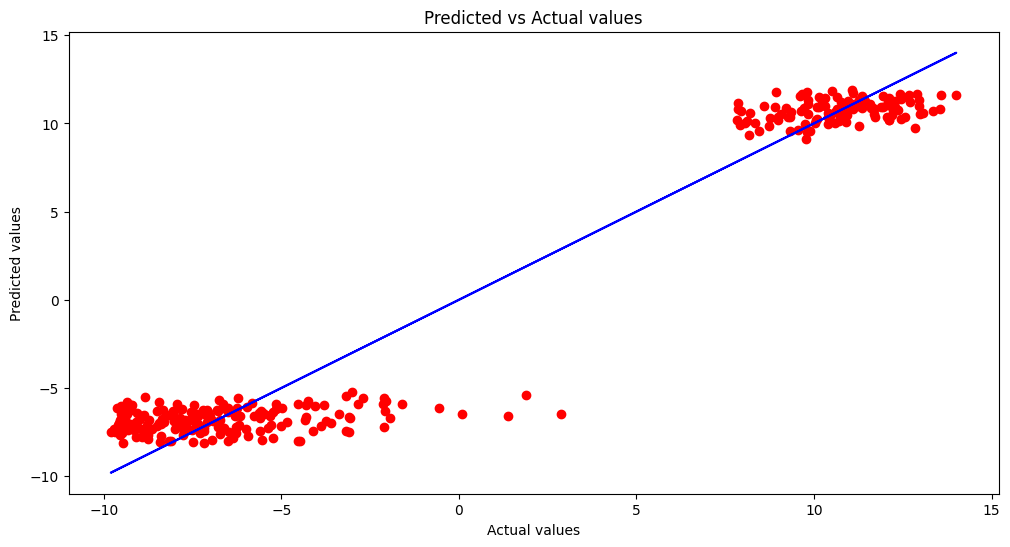

In [302]:
plt.figure(figsize=(12, 6))

plt.scatter(y_train_pca, model_3.predict(X_train), c="red")

plt.plot(y_train_pca, y_train_pca, color="blue")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values")
plt.show()

Plot suggests that model performs well in predicting some values but in general it lacks some kind of information to capture the dynamics of the data. It is trival to see that real data is splitted into two parts and the model is able to capture this dynamics at some level but not perfectly. More sophisticated models may be needed to capture the dynamics of the data. One option may be splitting the data into two parts and applying different models to each part.

Now, let’s apply the same models to the imaginary part of the data.

In [303]:
# Splitting the data into train and test sets

X_train_transformed, X_test_transformed, y_train_min_real, y_test_min_real = train_test_split(transformed_input_df, min_values_img, test_size=0.2, random_state=33)
X_train, X_test, y_train_pca, y_test_pca = train_test_split(input_df_scaled, principal_components_img, test_size=0.2, random_state=33)

# Adding the constant term to the input data

X_train_transformed = sm.add_constant(X_train_transformed)
X_train = sm.add_constant(X_train)

# Models
model_1 = sm.OLS(y_train_min_real, X_train).fit()
model_2 = sm.OLS(y_train_min_real, X_train_transformed).fit()
model_3 = sm.OLS(y_train_pca, X_train).fit()
model_4 = sm.OLS(y_train_pca, X_train_transformed).fit()

# Error metrics for the models
results = {
    "Min Img. Values + Original Input": accu(y_train_min_real, model_1.predict(X_train)),
    "Min Img. Values + PCA Components": accu(y_train_min_real, model_2.predict(X_train_transformed)),
    "PCA Img. Values + Original Input": accu(y_train_pca.flatten(), model_3.predict(X_train)),
    "PCA Img. Values + PCA Components": accu(y_train_pca.flatten(), model_4.predict(X_train_transformed))
}

for result in results:
    print(f"Error Metrics for {result}:")
    display(results[result])

Error Metrics for Min Img. Values + Original Input:


n      mean        sd        CV         FBias      MAPE      MAD  \
0  308 -0.115817  0.347515 -3.000562 -5.851223e-16  0.339673  0.21269   

       MADP     WMAPE  
0  0.675107 -1.836434

Error Metrics for Min Img. Values + PCA Components:


n      mean        sd        CV         FBias      MAPE       MAD  \
0  308 -0.115817  0.347515 -3.000562 -2.689073e-15  0.358327  0.222217   

       MADP     WMAPE  
0  0.705347 -1.918695

Error Metrics for PCA Img. Values + Original Input:


n      mean        sd         CV         FBias      MAPE       MAD  \
0  308 -0.047743  3.032182 -63.510958  1.328818e-14  3.646305  1.422633   

       MADP      WMAPE  
0  0.556841 -29.797942

Error Metrics for PCA Img. Values + PCA Components:


n      mean        sd         CV         FBias      MAPE       MAD  \
0  308 -0.047743  3.032182 -63.510958 -1.812025e-14  3.173258  1.468913   

       MADP      WMAPE  
0  0.574956 -30.767313

Here, it can be seen that PCA applied outputs again has more variance meaning that PCA method may be more effective in capturing the dynamics of the data. The error metrics show that original output performs a bit better compared to PCA applied outputs. 

Then, the test set of imaginary part is used to train and compare linear models. The results are similar to the training set. The original output performs a bit better compared to PCA applied outputs. The difference is more significant compared to the real part. This implies that the PCA applied output model can  be improved by using more components, more sophisticated models or different approaches.

In [304]:
X_test = sm.add_constant(X_test)
X_test_transformed = sm.add_constant(X_test_transformed)

# Making predictions on the test data
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test_transformed)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test_transformed)

results = {
    "Min Img. Values + Original Input": accu(y_test_min_real, y_pred_1),
    "Min Img. Values + PCA Components": accu(y_test_min_real, y_pred_2),
    "PCA Img. Values + Original Input": accu(y_test_pca.flatten(), y_pred_3),
    "PCA Img. Values + PCA Components": accu(y_test_pca.flatten(), y_pred_4)
}

for result in results:
    print(f"Error Metrics for {result}:")
    display(results[result])

Error Metrics for Min Img. Values + Original Input:


n      mean       sd        CV     FBias     MAPE       MAD      MADP  \
0  77 -0.085398  0.40051 -4.689924 -0.061943  0.48313  0.265315  0.732454   

      WMAPE  
0 -3.106801

Error Metrics for Min Img. Values + PCA Components:


n      mean       sd        CV     FBias      MAPE       MAD     MADP  \
0  77 -0.085398  0.40051 -4.689924 -0.074705  0.510912  0.271801  0.75036   

      WMAPE  
0 -3.182756

Error Metrics for PCA Img. Values + Original Input:


n      mean        sd         CV     FBias      MAPE       MAD      MADP  \
0  77  0.190971  3.495776  18.305307 -0.836736  1.460549  1.815246  0.585029   

      WMAPE  
0  9.505368

Error Metrics for PCA Img. Values + PCA Components:


n      mean        sd         CV     FBias      MAPE       MAD      MADP  \
0  77  0.190971  3.495776  18.305307 -0.819372  1.501551  1.855751  0.598084   

      WMAPE  
0  9.717471

Now, let's inspect the model 3 in more detail. The plot below shows the predicted values and the actual values. Plot shows that linear model can capture its distribution at some level but it lacks some kind of information to capture the dynamics of the data.

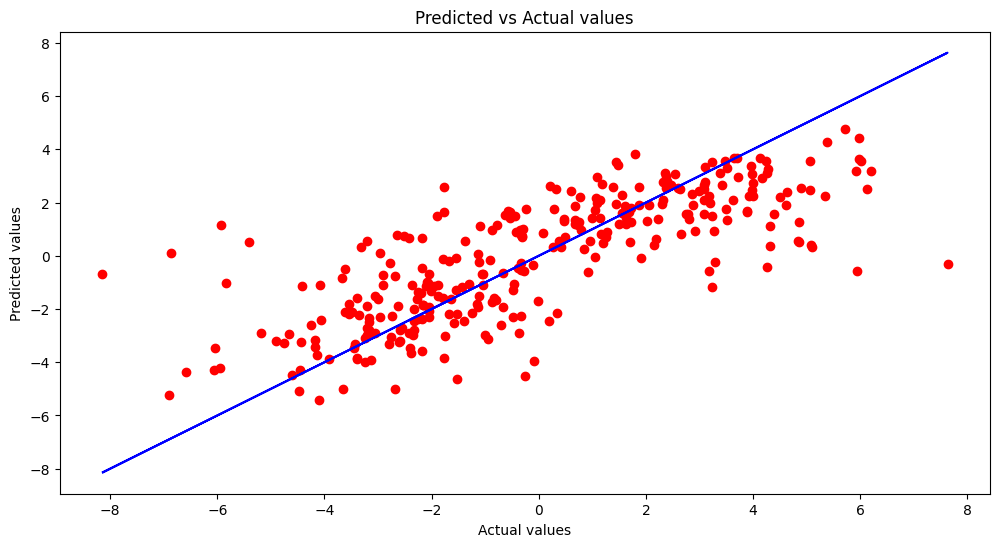

In [305]:
plt.figure(figsize=(12, 6))

plt.scatter(y_train_pca, model_3.predict(X_train), c="red")

plt.plot(y_train_pca, y_train_pca, color="blue")

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values")
plt.show()

Note that in all the applications above, the frequencies that provide the most information (highest variance) are inspected. These types of linear models do not capture relationships among the outputs themselves. To improve future studies, considering relationships between outputs is a promising option.

## 5. Conclusions <a name="conclusion"></a>

In conclusion, this assignment aimed to investigate the connection between antenna geometry parameters and S11 parameter values. By employing Principal Component Analysis (PCA) on the output data, the number of output variables was reduced to a single principal component that collectively explained some part of the variance in the data. This approach proved advantageous as it simplified the data and enhanced the efficiency of the predictive models. The results of the linear models indicated that the PCA-derived outputs were more effective in capturing the variability in the data compared to the approach that utilized the minimum value. This finding suggests that PCA is a more sophisticated method capable of capturing the dynamics of the data more effectively. Nevertheless, the linear models were unable to fully capture the dynamics of the data, implying that more sophisticated machine learning techniques or more detailed manipulations in the input data may be necessary to enhance the predictive accuracy of the models.


## 6. Code <a name="code"></a>

Click [here](https://github.com/BU-IE-582/fall-24-lmfaraday/blob/main/Homework%201/code.ipynb) to access the code.

--- 
AI usage in this homework assignment:
- Apple Intelligence is utilized to check the grammar of the text.
- Throughout the code, GitHub Copilot is employed to enhance coding efficiency.
